In [188]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [3]:
#import csv file
csv_path = Path("gun_deaths.csv")

#read data into dataframe
df = pd.read_csv(csv_path)

df.head()

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED


In [5]:
#drop null values from dataframe
new_df = df.dropna(how='any', inplace=False)

In [7]:
#delete police column
del new_df['police']

In [8]:
new_df['month'].value_counts()

month
7     8737
8     8512
5     8420
6     8418
9     8299
4     8207
12    8182
10    8181
3     8078
1     8056
11    8025
2     6900
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x15f39df7290>,
 [Text(0.5298085423541226, 0.9640035832135688, 'Homicide'),
  Text(-0.6021772961191678, -0.9205338147176388, 'Suicide'),
  Text(1.094247923224093, -0.1123453715991886, 'Accidental'),
  Text(1.099641101099903, -0.028097131024237516, 'Undetermined')])

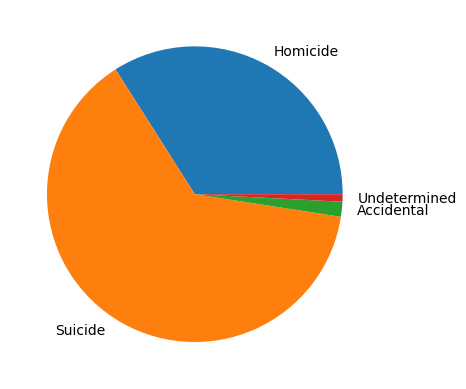

In [226]:
#group by year and intent to track suicides compared to homicides
intent_df = new_df.groupby(['intent'])['intent']

#show the breakdown of numbers
intent = intent_df.value_counts()
intent
labels1 = ["Homicide","Suicide","Accidental","Undetermined"]
sizes = [intent["Homicide"],intent["Suicide"],intent["Accidental"],intent["Undetermined"]]
piechart = plt.pie(sizes, labels=labels1)
piechart
plt.savefig("intentpie.png")

          count
year sex       
2012 M    27974
     F     4641
2013 M    27976
     F     4754
2014 M    27885
     F     4785
4785


([<matplotlib.patches.Wedge at 0x15f39e58150>,
 [Text(-0.988286004767942, 0.48300183517231005, '% Male'),
  Text(0.9882860273788885, -0.4830017889073033, '% Female')])

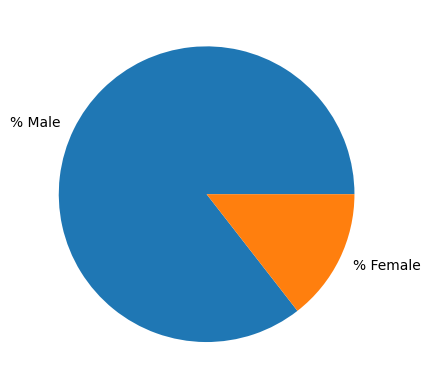

In [227]:
#What percent of gun deaths are males vs females
sex_df = new_df.groupby(['year'])['sex']
sexyear_df = pd.DataFrame(sex_df.value_counts())
print(sexyear_df)
#2012
male2012 = sexyear_df.loc[2012,'M']['count']
female2012 = sexyear_df.loc[2012,'F']['count']
#2013
male2013 = sexyear_df.loc[2013,'M']['count']
female2013 = sexyear_df.loc[2013,'F']['count']
#2014
male2014 = sexyear_df.loc[2014,'M']['count']
female2014 = sexyear_df.loc[(2014,'F')]['count']
print(female2014)
#percent for each year
total2012= male2012 + female2012
total2013=male2013 + female2013
total2014=male2014 + female2014
percentm2012 = round((male2012/total2012)*100,2)
percentf2012 = round((female2012/total2012)*100,2)
percentm2013 = round((male2013/total2013)*100,2)
percentf2013 = round((female2013/total2013)*100,2)
percentm2014 = round((male2014/total2014)*100,2)
percentf2014 = round((female2014/total2014)*100,2)
sex_deaths = pd.DataFrame({"% Male":[percentm2012,percentm2013, percentm2014] , "% Female":[percentf2012,percentf2013, percentf2014]})
sex_deaths
#average percent pie chart 
avgmale= round((percentm2012+percentm2013+percentm2014)/3,2)
avgfemale=round((percentf2012+percentf2013+percentf2014)/3,2)
sizes=[avgmale,avgfemale]
labels = ["% Male","% Female"]
plt.pie(sizes,labels= labels)
plt.savefig("malefemale.png")

In [203]:
#Which education level is most likely to die from a gun
edu_df = new_df.groupby(['year'])['education']
edu_df = pd.DataFrame(edu_df.value_counts())
edu_df

count
year education          
2012 HS/GED        13979
     Less than HS   7394
     Some college   7090
     BA+            4152
2013 HS/GED        14157
     Some college   7155
     Less than HS   7035
     BA+            4383
2014 HS/GED        14122
     Some college   7185
     Less than HS   7019
     BA+            4344

<Axes: xlabel='year'>

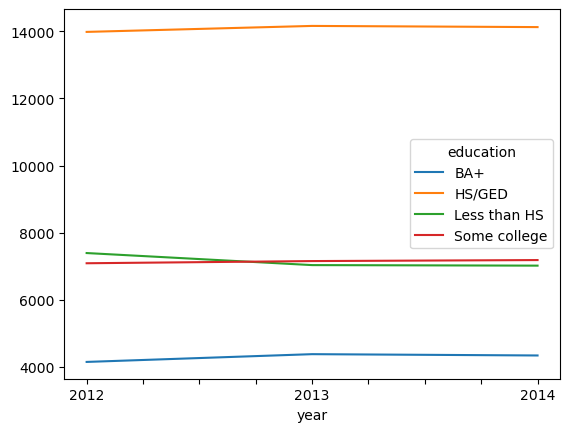

In [204]:
#Create a line graph showing the data for education and year
line_df = edu_df.reset_index().astype({"year":"str"}).pivot(index="year", columns="education", values="count")
line_df.plot()
plt.savefig("education_line.png")

<Axes: xlabel='year'>

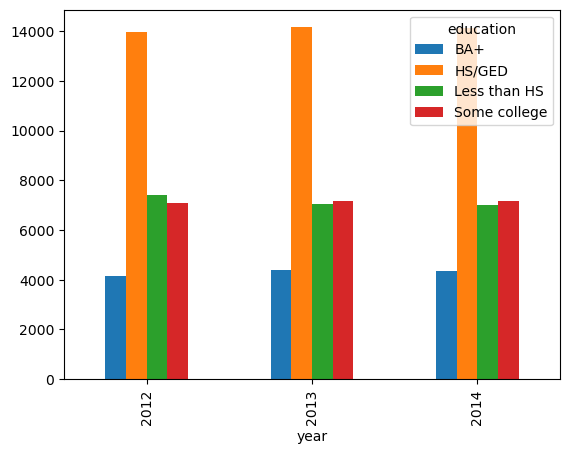

In [205]:
#Create a grouped bar graph that groups the year, education and death count
edu_index = edu_df.reset_index()
edu_index.head()
pivot2 = edu_index.pivot(index= "year",columns='education',values='count')
pivot2.head()
pivot2.plot(kind='bar')
plt.savefig("education_bar.png")

In [206]:
#What race is most likely to die from a gun
race = new_df.groupby(['year'])['race']
race_df = pd.DataFrame(race.value_counts())
race_df

count
year race                                 
2012 White                           21243
     Black                            7734
     Hispanic                         2914
     Asian/Pacific Islander            431
     Native American/Native Alaskan    293
2013 White                           21698
     Black                            7506
     Hispanic                         2813
     Asian/Pacific Islander            426
     Native American/Native Alaskan    287
2014 White                           21657
     Black                            7435
     Hispanic                         2876
     Asian/Pacific Islander            404
     Native American/Native Alaskan    298

<Axes: xlabel='year'>

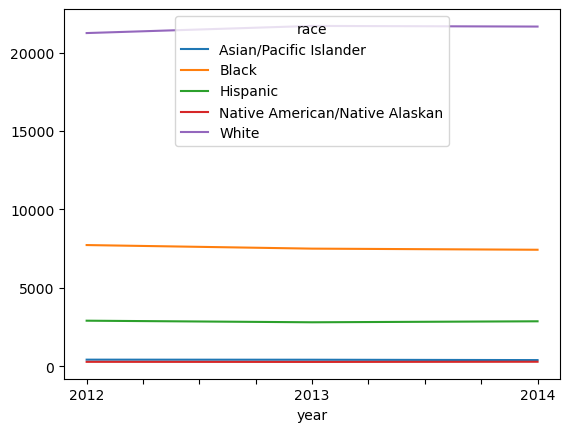

In [207]:
#Create a line graph for the race data set
line_df1 = race_df.reset_index().astype({"year":"str"}).pivot(index="year", columns="race", values="count")
line_df1.plot()
plt.savefig("race_line.png")

<Axes: xlabel='year'>

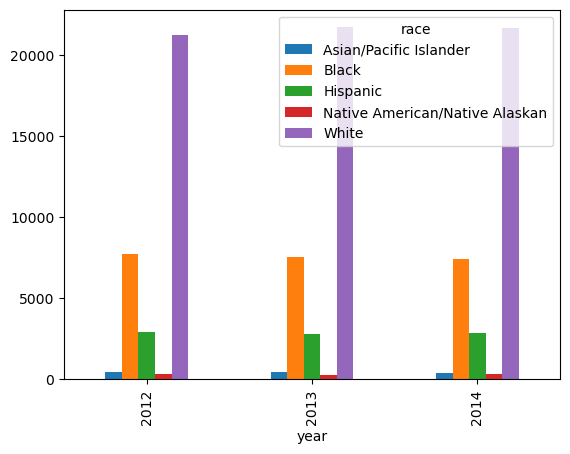

In [208]:
#Create a bar grouped bar graph showing race, year and death count
race_index = race_df.reset_index()
race_index.head()
pivot3 = race_index.pivot(index= "year",columns='race',values='count')
pivot3.head()
pivot3.plot(kind='bar')
plt.savefig("race_bar.png")

place
Home                       59622
Other specified            13545
Street                     11008
Other unspecified           8754
Trade/service area          3391
School/instiution            662
Farm                         465
Industrial/construction      239
Residential institution      201
Sports                       128
Name: count, dtype: int64
60.83
39.17


([<matplotlib.patches.Wedge at 0x15f36f0d3d0>,
 [Text(-0.3670615816433238, 1.0369502376109963, ''),
  Text(-0.4846080722447158, -0.9874993753493014, ''),
  Text(0.3572405996116707, -1.0403745258266823, ''),
  Text(0.9037381438964429, -0.627102357886344, ''),
  Text(1.0741206048479504, -0.23720228970453347, ''),
  Text(1.0957976870896218, -0.09605950743698127, ''),
  Text(1.098552018352503, -0.056422185119351126, ''),
  Text(1.099545400042099, -0.031621404874871605, ''),
  Text(1.0998819961267579, -0.016111939554849464, ''),
  Text(1.0999907428700788, -0.004512826180184491, '')])

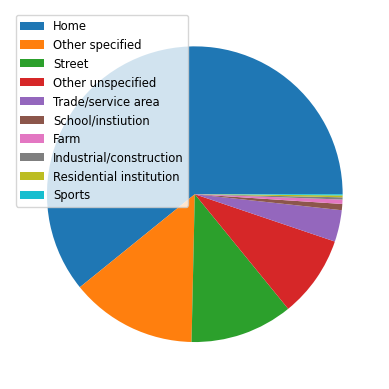

In [150]:
#Are you more likely to die in your own home or the streets Rachel
#make a pie chart
total_deaths = new_df["age"].count()
print(place_deaths)
place_deaths = pd.Series(new_df["place"].value_counts())
at_home_death = place_deaths["Home"]
not_home_death = place_deaths["Other specified"] + place_deaths["Street"] + place_deaths["Other unspecified"] + place_deaths["Trade/service area"] + place_deaths["School/instiution"] + place_deaths["Farm"] + place_deaths["Industrial/construction"] + place_deaths["Residential institution"] + place_deaths["Sports"]
not_home_death
percent_home_death = round((at_home_death /total_deaths)*100,2)
print(percent_home_death)
percent_not_home_death = round((not_home_death /total_deaths)*100,2)
print(percent_not_home_death)

#taking all of the data across years, here is how places compare
labels = ["Home","Other specified","Street","Other unspecified","Trade/service area","School/instiution","Farm","Industrial/construction","Residential institution","Sports"]
sizes = [place_deaths["Home"],place_deaths["Other specified"],place_deaths["Street"],place_deaths["Other unspecified"],place_deaths["Trade/service area"],place_deaths["School/instiution"],place_deaths["Farm"],place_deaths["Industrial/construction"],place_deaths["Residential institution"],place_deaths["Sports"]]
colors =["red","orange","blue","green","yellow","purple","lightskyblue","lightcoral","pink","turquoise"]
piechart = plt.pie(sizes)
plt.legend(labels, loc="upper left",fontsize= "small")
piechart
plt.savefig("placepie1.png")

([<matplotlib.patches.Wedge at 0x15f36fcf6d0>,
 [Text(-0.3670615816433238, 1.0369502376109963, 'Home'),
  Text(0.3670616787296102, -1.0369502032442062, 'Away from Home')])

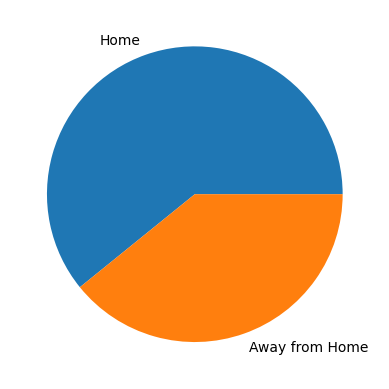

In [152]:
#taking data from all years, home vs not home simplified graph
labels = ["Home","Away from Home"]
sizes = [at_home_death, not_home_death]
piechart2 = plt.pie(sizes, labels=labels)
piechart2
plt.savefig("placepie2.png")

In [76]:
#deaths by place and by year
#total
yeartotaldeaths = new_df.groupby(["year"])["place"]
years_deaths = pd.Series(yeartotaldeaths.value_counts())
years_deaths
#2012
total_deaths_year2012 = years_deaths[2012,"Home"]+ years_deaths[2012,"Other specified"] + years_deaths[2012,"Street"] + years_deaths[2012,"Other unspecified"] + years_deaths[2012,"Trade/service area"] + years_deaths[2012,"School/instiution"] + years_deaths[2012,"Farm"] + years_deaths[2012,"Industrial/construction"] + years_deaths[2012,"Residential institution"] + years_deaths[2012,"Sports"]
at_home_death_year2012 = years_deaths[2012,"Home"]
not_home_death_year2012 = years_deaths[2012,"Other specified"] + years_deaths[2012,"Street"] + years_deaths[2012,"Other unspecified"] + years_deaths[2012,"Trade/service area"] + years_deaths[2012,"School/instiution"] + years_deaths[2012,"Farm"] + years_deaths[2012,"Industrial/construction"] + years_deaths[2012,"Residential institution"] + years_deaths[2012,"Sports"]
percent_home_death_year2012 = round((at_home_death_year2012 /total_deaths_year2012)*100,2)
percent_not_home_death_year2012 = round((not_home_death_year2012 /total_deaths_year2012)*100,2)
#2013
total_deaths_year2013 = years_deaths[2013,"Home"]+ years_deaths[2013,"Other specified"] + years_deaths[2013,"Street"] + years_deaths[2013,"Other unspecified"] + years_deaths[2013,"Trade/service area"] + years_deaths[2013,"School/instiution"] + years_deaths[2013,"Farm"] + years_deaths[2013,"Industrial/construction"] + years_deaths[2013,"Residential institution"] + years_deaths[2013,"Sports"]
at_home_death_year2013 = years_deaths[2013,"Home"]
not_home_death_year2013 = years_deaths[2013,"Other specified"] + years_deaths[2013,"Street"] + years_deaths[2013,"Other unspecified"] + years_deaths[2013,"Trade/service area"] + years_deaths[2013,"School/instiution"] + years_deaths[2013,"Farm"] + years_deaths[2013,"Industrial/construction"] + years_deaths[2013,"Residential institution"] + years_deaths[2013,"Sports"]
percent_home_death_year2013 = round((at_home_death_year2013 /total_deaths_year2013)*100,2)
percent_not_home_death_year2013 = round((not_home_death_year2013 /total_deaths_year2013)*100,2)
#2014
total_deaths_year2014 = years_deaths[2014,"Home"]+ years_deaths[2014,"Other specified"] + years_deaths[2014,"Street"] + years_deaths[2014,"Other unspecified"] + years_deaths[2014,"Trade/service area"] + years_deaths[2014,"School/instiution"] + years_deaths[2014,"Farm"] + years_deaths[2014,"Industrial/construction"] + years_deaths[2014,"Residential institution"] + years_deaths[2014,"Sports"]
at_home_death_year2014 = years_deaths[2014,"Home"]
not_home_death_year2014 = years_deaths[2014,"Other specified"] + years_deaths[2014,"Street"] + years_deaths[2014,"Other unspecified"] + years_deaths[2014,"Trade/service area"] + years_deaths[2014,"School/instiution"] + years_deaths[2014,"Farm"] + years_deaths[2014,"Industrial/construction"] + years_deaths[2014,"Residential institution"] + years_deaths[2014,"Sports"]
percent_home_death_year2014 = round((at_home_death_year2014 /total_deaths_year2014)*100,2)
percent_not_home_death_year2014 = round((not_home_death_year2014 /total_deaths_year2014)*100,2)
#create a summary df 
summary_deaths = pd.DataFrame({"Total deaths":[total_deaths_year2012,total_deaths_year2013,total_deaths_year2014],"Deaths at home":[at_home_death_year2012, at_home_death_year2013, at_home_death_year2014] , "Deaths away from home":[not_home_death_year2012, not_home_death_year2013, not_home_death_year2014],"Percent at home":[percent_home_death_year2012, percent_home_death_year2013, percent_home_death_year2014], "Percent away from home": [percent_not_home_death_year2012, percent_not_home_death_year2013, percent_not_home_death_year2014]})
yearsum = pd.Series([2012, 2013, 2014])
summary_deaths.set_index([yearsum])

,Total deaths,Deaths at home,Deaths away from home,Percent at home,Percent away from home
2012,32615,19440,13175,59.60,40.40
2013,32730,19814,12916,60.54,39.46
2014,32670,20368,12302,62.34,37.66


The above graphs demonstrate that over the years, there is a consistent pattern of around 60% of all total deaths occuring in the home with the remaining 40% being away from home. This is consistent with the statistic that the majority of our deaths are suicides not homicides and suicides are more likely to take place at ones own home (find citation for this )

In [124]:
#What month do the most gun deaths occur Rachel
#grouping death count by month and year 
deaths_by_month = new_df.groupby(["year","month"])
month_count = pd.DataFrame(deaths_by_month["month"].value_counts())
month_count = month_count.reset_index()
month_count.head()


,year,month,count
0,2012,1,2695
1,2012,2,2281
2,2012,3,2674
3,2012,4,2719
4,2012,5,2921


In [131]:
#using pivot to reorient data for graphing 
pivot = month_count.pivot(index='month',columns='year',values='count')
pivot.head()


year,2012,2013,2014
month,,,
1,2695,2778,2583
2,2281,2317,2302
3,2674,2784,2620
4,2719,2717,2771
5,2921,2729,2770


([<matplotlib.axis.XTick at 0x15f371a8910>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sept'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

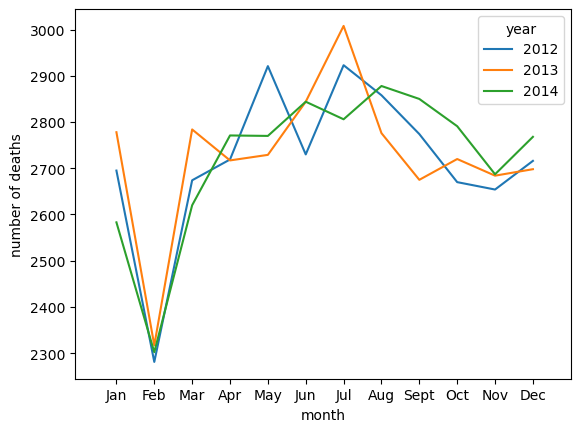

In [159]:
#line graph to show deaths each month for each year
fig1 = pivot.plot()
plt.xlim(-.1,13)
plt.ylabel("number of deaths")
ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
plt.xticks(ticks=ticks,labels=labels)
plt.savefig("monthsline.png")

([<matplotlib.axis.XTick at 0x15f374d2a10>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sept'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

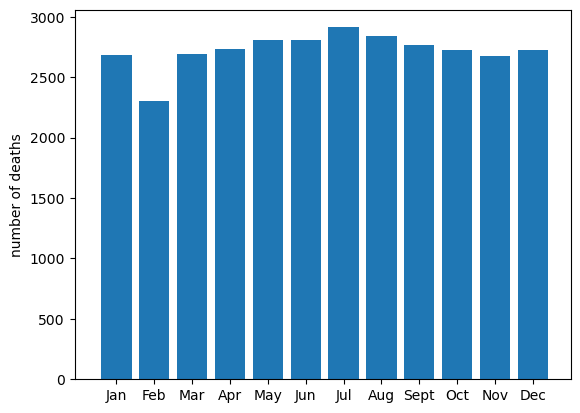

In [175]:
#bar graph to show monthly average across years 
plt.bar(months,averages)
plt.xlim(-.1,13)
plt.ylabel("number of deaths")
ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
plt.xticks(ticks=ticks,labels=labels)
plt.savefig("monthsbar.png")

When analyzing the relationship between month of the year and death count, there appears to be a pattern of increased death count in the months july and august which is consistent with existing research on increased violent crimes in the summer (add citations). When we examine the average death count across years for each month it puts the size of the increase into perspective. While it is notable, the difference is likely not statistically significant 


In [ ]:
#What ages are most likely to die by gun Latasha

In [ ]:
#Who is most likely to be a victim of gun death Latasha
